Keval Shah <br> 60009220061 <br>ML2 Lab6

In [1]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences

In [2]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(X_train[1])

[1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 2, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 2, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 2, 2, 349, 2637, 148, 605, 2, 2, 15, 123, 125, 68, 2, 2, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 2, 5, 2, 656, 245, 2350, 5, 4, 2, 131, 152, 491, 18, 2, 32, 2, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]


In [4]:
print(type(X_train[1]))

<class 'list'>


In [5]:
print(len(X_train[1]))

189


In [6]:
print(y_train[1])

0


In [7]:
print(type(y_train[1]))

<class 'numpy.int64'>


In [8]:
max_review_length = 400
X_train = pad_sequences(X_train, maxlen=max_review_length)
X_test = pad_sequences(X_test, maxlen=max_review_length)

In [9]:
print(X_train.shape)
print(X_train[1])

(25000, 400)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    

In [10]:
import tensorflow as tf

In [11]:
embedding_vector_length = 32

In [12]:
model = Sequential()
model.add(Embedding(top_words + 1, embedding_vector_length, input_length=max_review_length))
model.add(LSTM(10))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
hist=model.fit(X_train, y_train, epochs=10, batch_size=256,verbose=1, validation_data=(X_test,y_test))

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 31s 289ms/step - accuracy: 0.6354 - loss: 0.6621 - val_accuracy: 0.8189 - val_loss: 0.4490
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 35s 362ms/step - accuracy: 0.8433 - loss: 0.4006 - val_accuracy: 0.8479 - val_loss: 0.3756
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 32s 269ms/step - accuracy: 0.8762 - loss: 0.3301 - val_accuracy: 0.8613 - val_loss: 0.3485
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 265ms/step - accuracy: 0.8877 - loss: 0.3013 - val_accuracy: 0.8682 - val_loss: 0.3334
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 281ms/step - accuracy: 0.9009 - loss: 0.2648 - val_accuracy: 0.8636 - val_loss: 0.3324
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - accuracy: 0.9176 - loss: 0.2322 - val_accuracy: 0.8707 - val_loss: 0.3219
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 268ms/step - accuracy: 0.9257 - loss: 0.2087 - val_accuracy: 0.8722 - val_loss: 0.3283
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 271ms/step - accuracy: 0.9347 - loss: 0.1901 - val_accu

In [16]:
scores = model.evaluate(X_test, y_test, verbose=0)

In [17]:
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.55%


In [18]:
import matplotlib.pyplot as plt

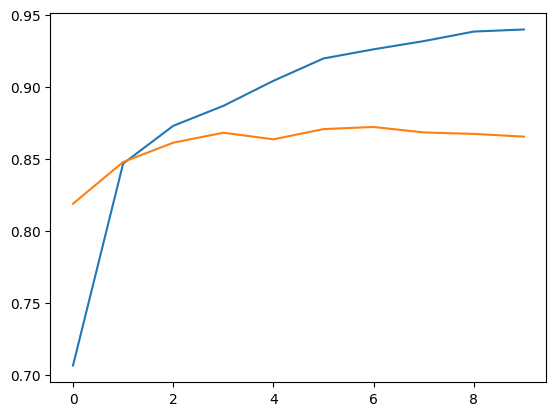

In [19]:
y1=hist.history['accuracy']
y2=hist.history['val_accuracy']
plt.plot(y1)
plt.plot(y2)

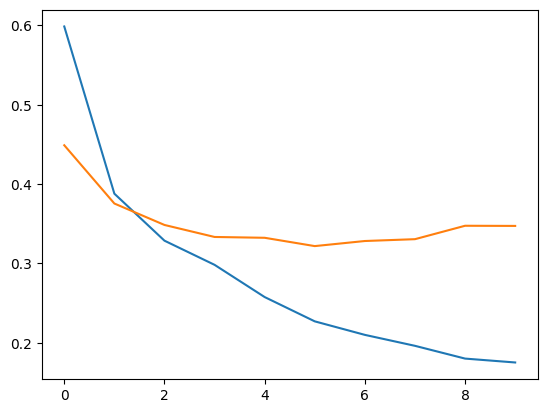

In [20]:
y1=hist.history['loss']
y2=hist.history['val_loss']
plt.plot(y1)
plt.plot(y2)

In [21]:
pred=model.predict(X_test)
print(pred)

782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step
[[0.06803194]
 [0.9906051 ]
 [0.80623823]
 ...
 [0.05449953]
 [0.11475011]
 [0.83198375]]


### Conclusion :
In this experiment, we successfully implemented a Long Short-Term Memory (LSTM) network, demonstrating its ability to handle sequential data and learn long-term dependencies effectively. LSTM's capability to retain important information over time makes it highly valuable for tasks like time-series forecasting, natural language processing, and speech recognition. Through this experiment, we observed how LSTMs can overcome issues like vanishing gradients, which often occur in traditional neural networks, and provide more accurate results when dealing with complex sequences.